In [32]:
# Import the required modules
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#this is an example distribution, feel free to change it
def p(x):
    #return np.sin(x-0.5)**2 * np.exp(-x**2) + .2*np.exp(-x**2)  #note, this one is not normalized pdf
    return (norm(7, 1).pdf(x) + norm(1, 2).pdf(x))/2

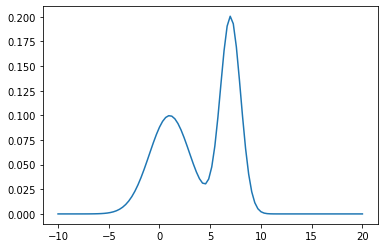

In [34]:
#let's plot it
x = np.linspace(-10,20,100)
y = p(x)
plt.plot(x,y)

## native python accept / reject

This is meant to be an easily readable implementation of the accept / reject algorithm.
It's easy to understand not very fast.

In [35]:
def accept_reject(N):
    xmin = -10
    xmax = 20
    pmax = 0.8

    n_accept=0
    x_list = [] 
    while n_accept < N:
        t = (xmax-xmin)*np.random.rand() + xmin
        y = np.random.rand()
        if y < p(t)/ pmax:
            n_accept += 1
            x_list.append(t)
    return x_list

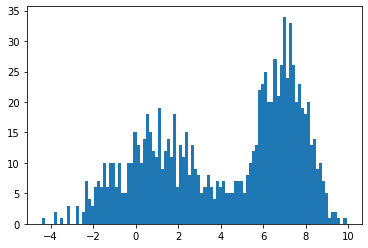

In [36]:
x = accept_reject(1000)
bins, edges, patches = plt.hist(x, bins=100)
plt.show()

In [37]:
xmin = -10
xmax = 20
pmax = 0.8
N_MC = 100000

t = np.random.uniform(xmin,xmax,N_MC)  #get uniform temporary x values
y = np.random.uniform(0,pmax,N_MC)  # get uniform random y values

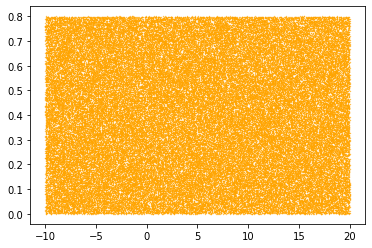

In [38]:
# plot all the t-y pairs
plt.scatter(t,y, s=0.1, c='orange')

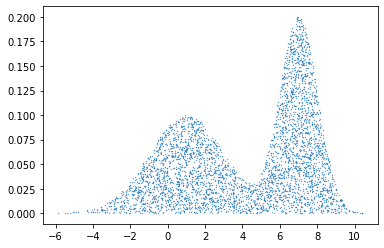

In [39]:
#make a mask that keeps index to the accepted pairs. Plot them
mask = y<p(t)
plt.scatter(t[mask],y[mask], s=0.1)

In [40]:
#inspect the mask
mask

array([False, False, False, ..., False, False, False])

In [41]:
#inspect the 0th entry
t[0], y[0], p(t[0]), mask[0]

(-3.8241702708086303, 0.7984770302280763, 0.005438183199670055, False)

In [42]:
#How many t's are there beore / after the mask
t.size, t[mask].size

(100000, 4102)

In [43]:
accept_prob = t[mask].size/t.size

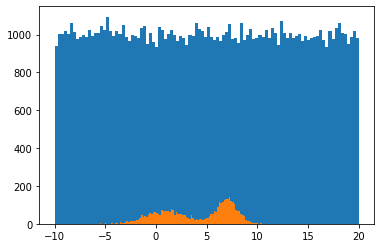

In [44]:
#histogram the t values with and without the mask
_ = plt.hist(t, bins=100)
_ = plt.hist(t[mask], bins=100)

## compare speed of the two approaches

In [45]:
%%timeit 
xmin = -3
xmax = 3
pmax = 0.8
N_MC = 100000

t = np.random.uniform(xmin,xmax,N_MC)  #get uniform temporary x values
y = np.random.uniform(0,pmax,N_MC)  # get uniform random y values
mask = y<p(t)

72.7 ms ± 7.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%%timeit
N_MC = 100000
#for a fair comparison, we will ask accept_reject to return the same number
average_accept = N_MC*accept_prob
x = accept_reject(average_accept)

The slowest run took 6.70 times longer than the fastest. This could mean that an intermediate result is being cached.
36min 19s ± 31min 44s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
#How much faster?
564/5.56

101.43884892086332

## Metropolis-Hastings

Expected Value of x  = 4.009469038956209 with variance = 11.45082266595432


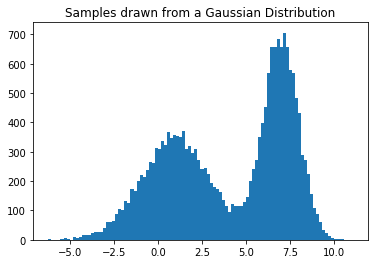

In [48]:
# Let's sample a random distribution and plot the histogram of the samples
x = np.hstack((np.random.normal(7, 1, 10000), np.random.normal(1, 2, 10000)))
print('Expected Value of x  = {} with variance = {}'.format(np.mean(x), np.var(x)))
plt.hist(x, bins=100)
plt.title('Samples drawn from a Gaussian Distribution')
plt.show()

In [49]:
# Initialize x_0
x = 5
# Number of samples
N = 1000
# I think when we are not sure
# we should keep the `sigma` as large
# as possible, so that we sample the entire space
sigma = 100
# List of sampled points
x_sampled = []
for i in range(N-1):
    # Sample `x_star` from a gaussian distribution centered around `x`
    x_star = norm(x, sigma).rvs()
    # `u` lies in [0, 1]
    u = np.random.uniform()
    if u < min(1, (p(x_star)*norm(x_star, sigma).pdf(x))/(p(x)*norm(x, sigma).pdf(x_star))):
        x = x_star
    x_sampled.append(x)

Expected Value of x  = 3.61281045747447 with variance = 9.582769438812027


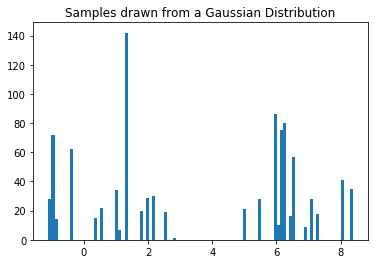

In [50]:
# Plot the sampled distribution
print('Expected Value of x  = {} with variance = {}'.format(np.mean(x_sampled), np.var(x_sampled)))
plt.hist(x_sampled, bins=100)
plt.title('Samples drawn from a Gaussian Distribution')
plt.show()